In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

data_climate = pd.read_csv('data_fortaleza-CE.csv')
data_climate.columns = ['codigo_estacao','data','hora','temp_inst','temp_max','temp_min','umid_inst','umid_max','umid_min','pto_orvalho_inst','pto_orvalho_max','pto_orvalho_min','pressao','pressao_max','pressao_min','vento_direcao','vento_vel','vento_rajada','radiacao','precipitacao']

#fix random seed for reproducibility
np.random.seed(7)

#using neural networks recurrents
#network short memory with LSTM, she use backpropagation through time and have memory block instead neruons.
dataset = pd.DataFrame(data_climate[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','vento_direcao','vento_vel']])
dataset = dataset.values
dataset = dataset.astype('float32')

#To reduce the data from [0,1] scale with pre-preprocessing
#Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

#split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train,test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print('Train dimensions ->{}'.format(train.shape))
print('Test dimensions ->{}'.format(test.shape))

'''
To define a new dataset
args : the olg dataset(np array),
       look_back(you select times before and number steps for prevent the next period)
'''
# convert an array of values into a dataset matrix
def create_new_dataset(dataset,look_back=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)


#In this new_dataset, the fisrt columns is X=t and second is Y=t+1
new_dataset = create_new_dataset(dataset)

#reshape into X = t and Y = t+1
look_back = 1
trainX,trainY = create_new_dataset(train,look_back)
testX,testY = create_new_dataset(test,look_back)

'''
LSTM needs the X(inputs) args this form: [samples,time steps, features], 
now the data is = [samples,features], we uses the numpy.reshape() for reshape
'''
#reshape input to be [samples,time steps, features]
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

'''
Now, the LSTM!!!

LSTM needs 3 layers : 1ºinput layer
                      2ºhidden layer with 4 LSTM blocks or neural
                      3ºoutput layer

 - General is just one output;
 - Sigmoid function is used for LSTM blocks;
 - For default, is 100 epoch by train.
'''

#create and fir the LSTM network
model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=300,batch_size=1,verbose=2)


#Try inverse predictions

#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))





Train dimensions ->(1276, 8)
Test dimensions ->(629, 8)
Epoch 1/300
 - 5s - loss: 0.0844
Epoch 2/300
 - 3s - loss: 0.0520
Epoch 3/300
 - 4s - loss: 0.0503
Epoch 4/300
 - 4s - loss: 0.0501
Epoch 5/300
 - 4s - loss: 0.0498
Epoch 6/300
 - 4s - loss: 0.0498
Epoch 7/300
 - 4s - loss: 0.0497
Epoch 8/300
 - 4s - loss: 0.0496
Epoch 9/300
 - 4s - loss: 0.0497
Epoch 10/300
 - 4s - loss: 0.0496
Epoch 11/300
 - 4s - loss: 0.0496
Epoch 12/300
 - 4s - loss: 0.0498
Epoch 13/300
 - 4s - loss: 0.0497
Epoch 14/300
 - 4s - loss: 0.0496
Epoch 15/300
 - 3s - loss: 0.0494
Epoch 16/300
 - 3s - loss: 0.0494
Epoch 17/300
 - 3s - loss: 0.0494
Epoch 18/300
 - 3s - loss: 0.0492
Epoch 19/300
 - 3s - loss: 0.0493
Epoch 20/300
 - 3s - loss: 0.0495
Epoch 21/300
 - 3s - loss: 0.0493
Epoch 22/300
 - 3s - loss: 0.0493
Epoch 23/300
 - 3s - loss: 0.0495
Epoch 24/300
 - 3s - loss: 0.0494
Epoch 25/300
 - 3s - loss: 0.0494
Epoch 26/300
 - 3s - loss: 0.0493
Epoch 27/300
 - 3s - loss: 0.0493
Epoch 28/300
 - 3s - loss: 0.0492
E

Epoch 237/300
 - 4s - loss: 0.0461
Epoch 238/300
 - 4s - loss: 0.0460
Epoch 239/300
 - 4s - loss: 0.0459
Epoch 240/300
 - 4s - loss: 0.0459
Epoch 241/300
 - 4s - loss: 0.0459
Epoch 242/300
 - 4s - loss: 0.0458
Epoch 243/300
 - 4s - loss: 0.0460
Epoch 244/300
 - 4s - loss: 0.0459
Epoch 245/300
 - 4s - loss: 0.0459
Epoch 246/300
 - 4s - loss: 0.0459
Epoch 247/300
 - 4s - loss: 0.0459
Epoch 248/300
 - 4s - loss: 0.0459
Epoch 249/300
 - 4s - loss: 0.0460
Epoch 250/300
 - 4s - loss: 0.0458
Epoch 251/300
 - 4s - loss: 0.0459
Epoch 252/300
 - 4s - loss: 0.0460
Epoch 253/300
 - 4s - loss: 0.0456
Epoch 254/300
 - 4s - loss: 0.0457
Epoch 255/300
 - 4s - loss: 0.0459
Epoch 256/300
 - 4s - loss: 0.0456
Epoch 257/300
 - 4s - loss: 0.0459
Epoch 258/300
 - 4s - loss: 0.0457
Epoch 259/300
 - 4s - loss: 0.0458
Epoch 260/300
 - 4s - loss: 0.0458
Epoch 261/300
 - 4s - loss: 0.0458
Epoch 262/300
 - 4s - loss: 0.0458
Epoch 263/300
 - 4s - loss: 0.0458
Epoch 264/300
 - 4s - loss: 0.0457
Epoch 265/300
 - 4s 

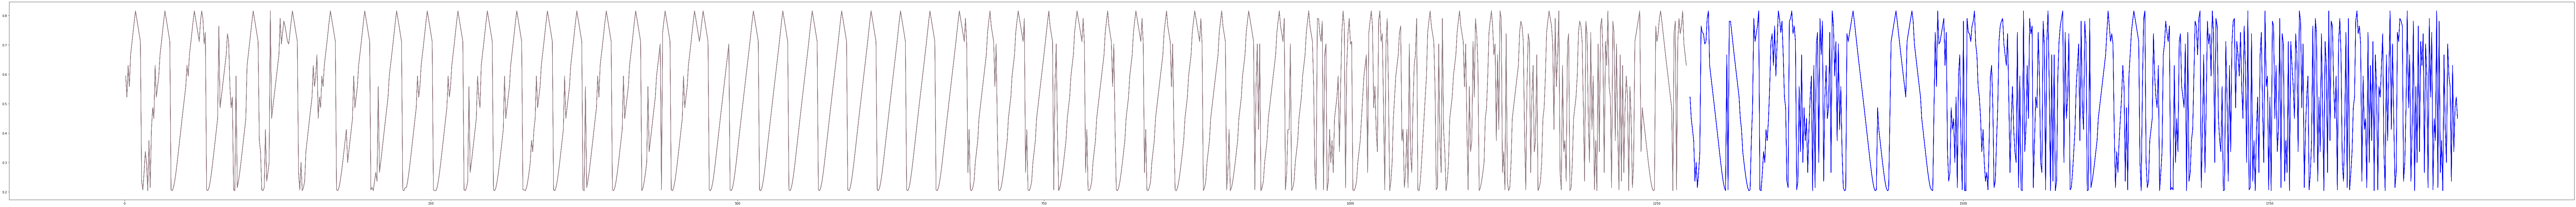

In [25]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.rcParams['figure.figsize'] = (152,12)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot,color='b')
plt.show()

In [26]:
trainPredictPlot.shape

(1905, 8)

In [27]:
testPredictPlot.shape

(1905, 8)

In [28]:
trainPredict.shape

(1274, 1)

In [29]:
testPredict.shape

(627, 1)

In [30]:
trainPredict

array([[0.5940484],
       [0.5224166],
       [0.6299661],
       ...,
       [0.7030972],
       [0.6662513],
       [0.6299661]], dtype=float32)

In [31]:
testPredict

array([[0.5224166 ],
       [0.44955683],
       [0.41230306],
       [0.37460607],
       [0.23658587],
       [0.300194  ],
       [0.21492764],
       [0.26598543],
       [0.33692372],
       [0.7640338 ],
       [0.7423295 ],
       [0.73785746],
       [0.7030972 ],
       [0.7114854 ],
       [0.7899082 ],
       [0.8153503 ],
       [0.6299661 ],
       [0.5940484 ],
       [0.55827713],
       [0.5224166 ],
       [0.4862372 ],
       [0.44955683],
       [0.41230306],
       [0.37460607],
       [0.33692372],
       [0.300194  ],
       [0.26598543],
       [0.23658587],
       [0.21492764],
       [0.20422183],
       [0.6662513 ],
       [0.20719801],
       [0.78068805],
       [0.78068805],
       [0.7423295 ],
       [0.7030972 ],
       [0.6662513 ],
       [0.6299661 ],
       [0.5940484 ],
       [0.55827713],
       [0.5224166 ],
       [0.44955683],
       [0.41230306],
       [0.33692372],
       [0.300194  ],
       [0.26598543],
       [0.23658587],
       [0.214

In [32]:
trainX.shape

(1274, 1, 1)

In [33]:
trainX

array([[[0.5652174 ]],

       [[0.47826087]],

       [[0.6086957 ]],

       ...,

       [[0.6956522 ]],

       [[0.65217394]],

       [[0.6086957 ]]], dtype=float32)

In [34]:
testX.shape

(627, 1, 1)

In [35]:
testX

array([[[0.47826087]],

       [[0.39130434]],

       [[0.3478261 ]],

       [[0.30434784]],

       [[0.13043478]],

       [[0.21739131]],

       [[0.08695652]],

       [[0.17391305]],

       [[0.26086956]],

       [[0.9130435 ]],

       [[0.73913044]],

       [[0.95652175]],

       [[0.6956522 ]],

       [[1.        ]],

       [[0.86956525]],

       [[0.826087  ]],

       [[0.6086957 ]],

       [[0.5652174 ]],

       [[0.5217391 ]],

       [[0.47826087]],

       [[0.43478262]],

       [[0.39130434]],

       [[0.3478261 ]],

       [[0.30434784]],

       [[0.26086956]],

       [[0.21739131]],

       [[0.17391305]],

       [[0.13043478]],

       [[0.08695652]],

       [[0.04347826]],

       [[0.65217394]],

       [[0.        ]],

       [[0.7826087 ]],

       [[0.7826087 ]],

       [[0.73913044]],

       [[0.6956522 ]],

       [[0.65217394]],

       [[0.6086957 ]],

       [[0.5652174 ]],

       [[0.5217391 ]],

       [[0.47826087]],

       [[0.39130

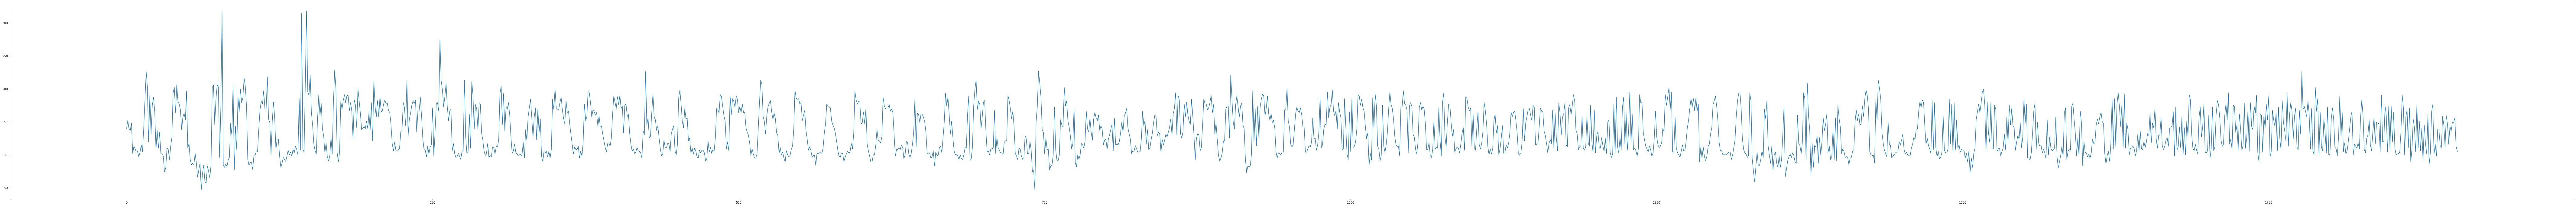

In [36]:
plt.plot(data_climate.vento_vel)

In [37]:
data_climate.vento_vel

0       140
1       152
2       139
3       137
4       148
       ... 
1900    149
1901    149
1902    156
1903    113
1904    105
Name: vento_vel, Length: 1905, dtype: int64

In [38]:
trainX.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'